In [166]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

df = pd.read_csv(r"housing.data", sep=" +", engine="python", header=None, names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])

selected_data = df.loc[:, ["LSTAT","MEDV"]]

In [167]:
Q1 = selected_data.quantile(0.25)
Q3 = selected_data.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)

LSTAT     6.950
MEDV     17.025
Name: 0.25, dtype: float64

LSTAT    16.955
MEDV     25.000
Name: 0.75, dtype: float64

LSTAT    10.005
MEDV      7.975
dtype: float64


In [168]:
outlier_condition = ((selected_data < (Q1 - 1.5 * IQR)) | (selected_data > (Q3 +1.5 * IQR)))
data = selected_data[~outlier_condition.any(axis=1)]
data

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [169]:
X = data["LSTAT"].values.reshape(-1,1)
y = data["MEDV"].values.reshape(-1,1)

In [170]:
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [171]:
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

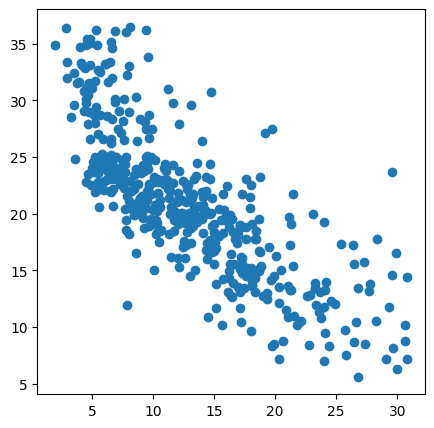

In [172]:
plt.figure(figsize=(5,5))
plt.scatter(X, y)

In [173]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)

In [174]:
X

array([[-1.23798775e+00],
       [-5.91441575e-01],
       [-1.38563651e+00],
       [-1.55504405e+00],
       [-1.18359084e+00],
       [-1.20224121e+00],
       [-8.01105870e-02],
       [ 9.64310155e-01],
       [ 2.63973510e+00],
       [ 6.45699661e-01],
       [ 1.16635583e+00],
       [ 5.04420058e-02],
       [ 4.29666204e-01],
       [-7.28210958e-01],
       [-4.17371452e-01],
       [-6.95572810e-01],
       [-9.89316144e-01],
       [ 2.68029660e-01],
       [-1.95121204e-01],
       [-2.58843303e-01],
       [ 1.25494509e+00],
       [ 1.37477068e-01],
       [ 8.97479661e-01],
       [ 1.07776658e+00],
       [ 5.21363858e-01],
       [ 5.54002006e-01],
       [ 2.89788426e-01],
       [ 6.73675217e-01],
       [-2.26052783e-02],
       [-1.50049476e-01],
       [ 1.50050830e+00],
       [ 1.46954625e-02],
       [ 2.29470324e+00],
       [ 8.39974353e-01],
       [ 1.14925966e+00],
       [-5.07514909e-01],
       [-2.38638735e-01],
       [-6.48946884e-01],
       [-4.3

In [175]:
y

array([[ 0.49295051],
       [ 0.11678379],
       [ 2.17002714],
       [ 1.96627017],
       [ 2.40513134],
       [ 1.22961034],
       [ 0.32054076],
       [ 0.97883252],
       [-0.6825705 ],
       [-0.30640378],
       [-0.9176747 ],
       [-0.30640378],
       [ 0.1324574 ],
       [-0.07129957],
       [-0.41611907],
       [-0.14966764],
       [ 0.35188799],
       [-0.52583436],
       [-0.1026468 ],
       [-0.41611907],
       [-1.13710529],
       [-0.19668848],
       [-0.88632747],
       [-0.99604276],
       [-0.82363302],
       [-1.09008444],
       [-0.66689688],
       [-0.94902192],
       [-0.38477184],
       [ 0.02274211],
       [-1.27816781],
       [-0.99604276],
       [-1.19979974],
       [-1.21547335],
       [-1.1527789 ],
       [-0.30640378],
       [-0.13399403],
       [ 0.02274211],
       [ 0.6026658 ],
       [ 1.55875622],
       [ 2.20137437],
       [ 0.90046446],
       [ 0.69670748],
       [ 0.6026658 ],
       [ 0.05408933],
       [-0

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_train, y_train)

# Equivalent to: ...

# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# lin_reg = make_pipeline(StandardScaler(), LinearRegression())
# lin_reg.fit(X_train, y_train)
# lin_reg.score(X_train, y_train)

0.6255573588830468

In [177]:
y_pred_test = lin_reg.predict(X_test)
y_pred_test

array([[ 0.76298139],
       [-0.00388065],
       [ 0.48117518],
       [-1.02761031],
       [-0.21087106],
       [-1.68973022],
       [-1.06751207],
       [-0.25950133],
       [-0.23705659],
       [ 0.02853953],
       [ 0.15073869],
       [-0.40414523],
       [-1.84684342],
       [ 0.64452303],
       [ 0.94877399],
       [-1.39670164],
       [-2.23339177],
       [ 0.34276593],
       [-1.38049154],
       [ 0.74801823],
       [ 0.28914793],
       [ 0.64826382],
       [-0.00263372],
       [ 1.0360591 ],
       [-0.54504834],
       [ 0.09712069],
       [-0.04627628],
       [ 0.87395818],
       [-2.04385839],
       [-0.63981503],
       [-0.01260916],
       [ 0.98119417],
       [-1.04007961],
       [ 0.37643304],
       [ 1.10588719],
       [-1.06626514],
       [ 0.59838661],
       [ 0.14450404],
       [-0.02383154],
       [-2.12366192],
       [-0.26448906],
       [-0.06872102],
       [-1.43286261],
       [-0.47896104],
       [-0.28319301],
       [-0

In [178]:
y_pred_train = lin_reg.predict(X_train)
y_pred_train

array([[ 0.52731159],
       [-1.07499366],
       [ 0.2093444 ],
       [-0.08617804],
       [ 0.45000192],
       [-0.65228433],
       [ 0.80662395],
       [-0.94157213],
       [ 0.41758174],
       [ 0.42381639],
       [-1.73586664],
       [-0.84680544],
       [ 0.33777821],
       [ 1.06972621],
       [ 0.82408097],
       [-0.5226036 ],
       [ 0.30909882],
       [ 0.42132253],
       [ 0.55723792],
       [-1.80569473],
       [ 0.4325449 ],
       [ 1.03979989],
       [-0.17845087],
       [ 0.11083692],
       [ 0.55599099],
       [-0.0762026 ],
       [-0.58370317],
       [ 0.74427744],
       [ 1.1931723 ],
       [-0.22458729],
       [ 0.77046297],
       [ 0.77919148],
       [ 0.10709613],
       [ 0.94877399],
       [-0.87548483],
       [ 0.40261858],
       [-1.3455775 ],
       [ 1.03979989],
       [-0.19092018],
       [-0.65228433],
       [-0.09365962],
       [-0.43905928],
       [ 0.46870588],
       [ 0.11457771],
       [ 0.40137165],
       [ 0

In [179]:
X_train

array([[-0.66448886],
       [ 1.33265497],
       [-0.26816849],
       [ 0.10017633],
       [-0.56812861],
       [ 0.80578201],
       [-1.01262911],
       [ 1.16635583],
       [-0.52771948],
       [-0.53549046],
       [ 2.15637966],
       [ 1.04823682],
       [-0.42825083],
       [-1.34056479],
       [-1.03438787],
       [ 0.64414546],
       [-0.39250429],
       [-0.53238207],
       [-0.7017896 ],
       [ 2.24341472],
       [-0.54636985],
       [-1.30326405],
       [ 0.21518694],
       [-0.14538688],
       [-0.7002354 ],
       [ 0.08774275],
       [ 0.72030114],
       [-0.93491923],
       [-1.49443034],
       [ 0.27269225],
       [-0.96755738],
       [-0.97843676],
       [-0.14072429],
       [-1.18980763],
       [ 1.08398337],
       [-0.50906911],
       [ 1.66991584],
       [-1.30326405],
       [ 0.23072892],
       [ 0.80578201],
       [ 0.10950151],
       [ 0.54001423],
       [-0.59144158],
       [-0.15004948],
       [-0.50751491],
       [-0

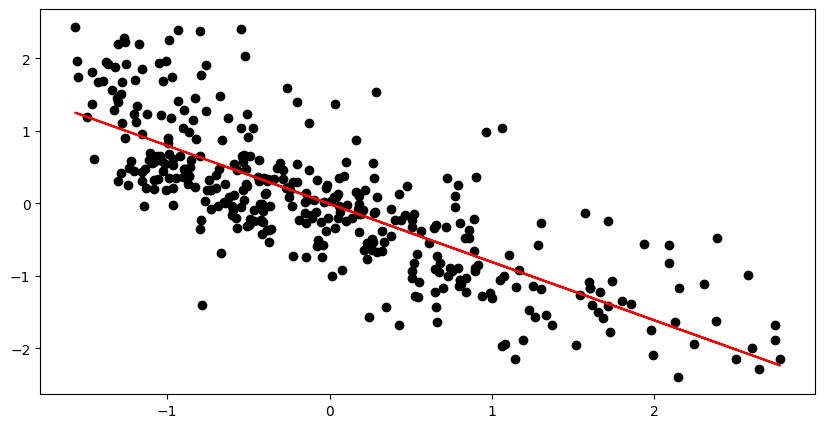

In [180]:
# fig, ax = plt.subplots(2, 2, figsize=(8, 8))
# ax[0,0].scatter(X_train, y_train, color = "gold")
# ax[0,0].plot(X_train, y_pred_train, color = "blue")

plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, lin_reg.predict(X_train), color="red")

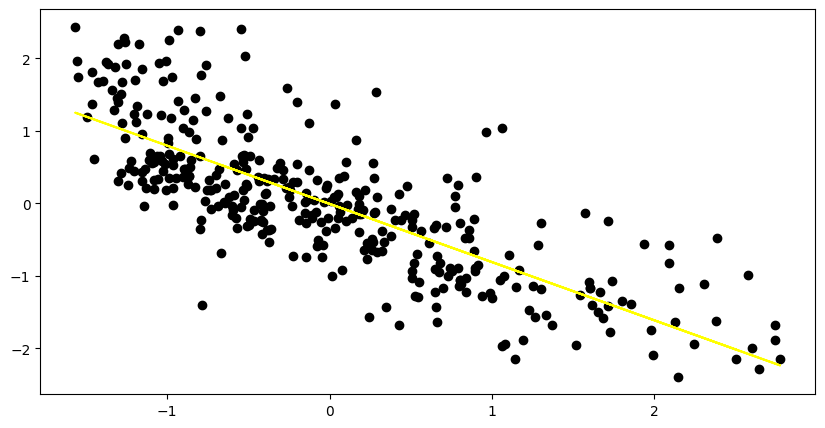

In [181]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, lin_reg.predict(X_train), color="yellow")

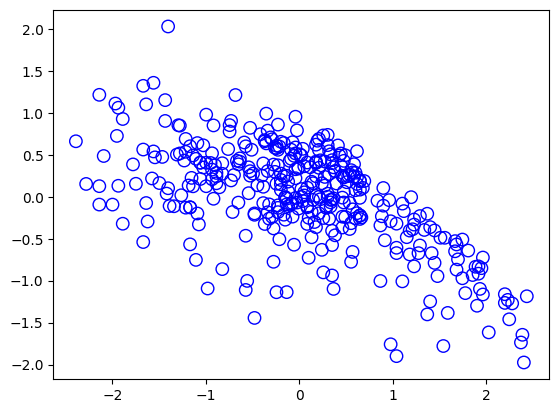

In [182]:
plt.scatter(y_train, y_pred_train - y_train, s=80, facecolors="none", edgecolors="blue")

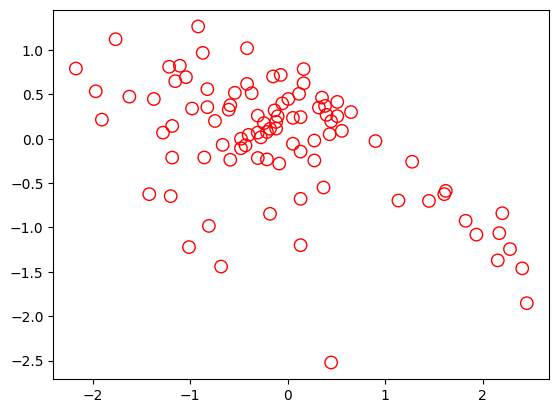

In [183]:
plt.scatter(y_test, y_pred_test - y_test, s=80, facecolors="none", edgecolors="red")